# 图像的加法或平均技术

图像的加法或平均是一种用于降低图像中随机噪声的简单技术。这种方法背后的基本思想是：当多个受噪声污染的图像被相加或平均时，随机噪声会减少，而图像中的原始信息会增强。这种方法在以下场景中特别有效：

- 当我们有多个由相同场景拍摄但受到不同随机噪声影响的图像时。
- 在天文摄影中，为了提高星空图像的质量，通常会捕获多个曝光并将它们平均到一起。

## 原理

考虑一个简单的例子，我们有两个像素值：一个是100，另一个是100加上某个噪声值（假设噪声是一个在-10到10之间的随机值）。当我们平均这两个像素时，噪声的效果会减少。这是因为随机噪声的期望值是0，所以当我们平均多个带噪声的图像时，噪声会趋于0。

## 方法

1. **获取多个带噪声的图像**：首先，你需要多个由相同场景拍摄但受到不同随机噪声影响的图像。
2. **图像加法**：将所有图像逐像素相加。
3. **图像平均**：将相加的结果除以图像的数量，得到平均图像。

## 数学表示

假设我们有n个图像，每个图像表示为I_i（其中i=1,2,...,n），那么去噪后的图像I_avg可以表示为：
I_avg(x, y) = (1/n) * sum(i=1 to n) I_i(x, y)


其中，(x, y)是图像中的像素位置。

## 优点和缺点

### 优点：

- 简单，易于实现。
- 当有足够多的图像时，效果非常好。

### 缺点：

- 需要多个图像。
- 对于非随机噪声或场景中的移动物体，效果可能不佳。


插值（Interpolation）是一种估计函数在已知数据点之间的值的方法。在数字图像处理中，差值常用于图像缩放、旋转和其他几何变换。以下是一些常见的差值方法：

最近邻插值 (Nearest-neighbor interpolation):
原理：对于图像中的每个新位置，使用距离最近的原始像素值。
优点：计算速度快。
缺点：可能会导致图像在放大时出现块状或锯齿状的边缘。

双线性插值 (Bilinear interpolation):
原理：基于原始图像中的四个最近邻像素的加权平均来估计新像素值。
优点：结果较为平滑，适合大多数应用场合。
缺点：计算量较大。

双三次插值 (Bicubic interpolation):
原理：使用16个邻近像素的加权平均来估计新像素值。权重基于像素到新位置的距离的三次函数。
优点：提供了比双线性插值更平滑、更精确的结果。
缺点：计算复杂度更高。

Lanczos 插值:
原理：使用 sinc 函数作为插值核心，通常考虑更多的像素来估计新像素值。
优点：在某些情况下，提供了比双三次插值更好的结果。
缺点：计算复杂度高。

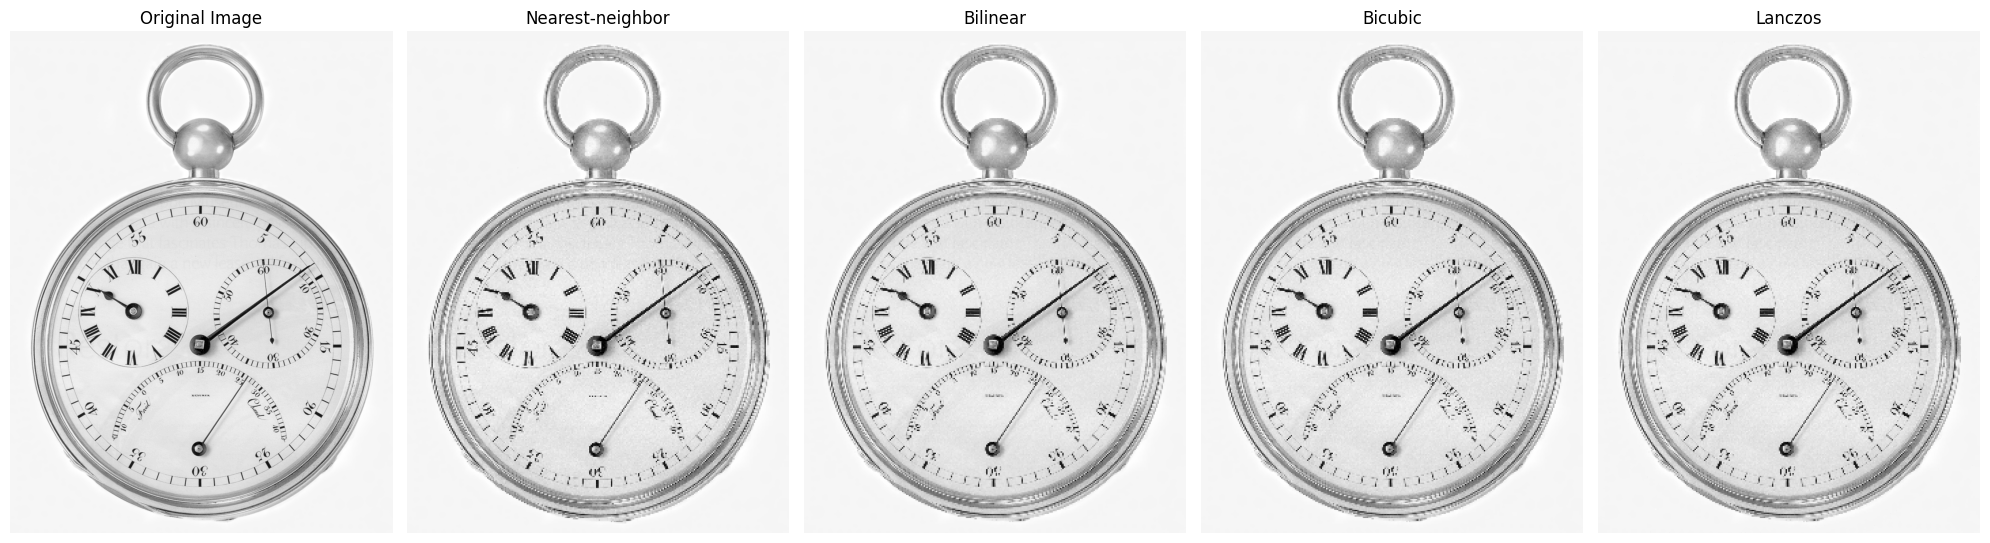

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Load the uploaded image using OpenCV
path = 'DIP3E_Original_Images_CH02/Fig0220(a)(chronometer 3692x2812  2pt25 inch 1250 dpi).tif'
img = cv2.imdecode(np.fromfile(path, dtype=np.uint8), 0)

# Define the scaling factor
scale_factor = 1/10.0

# Resize the image using different interpolation methods
img_nearest = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
img_bilinear = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
img_bicubic = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
img_lanczos = cv2.resize(img, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LANCZOS4)

# Display the images
fig, axs = plt.subplots(1, 5, figsize=(20, 20))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(img_nearest, cmap='gray')
axs[1].set_title('Nearest-neighbor')
axs[1].axis('off')

axs[2].imshow(img_bilinear, cmap='gray')
axs[2].set_title('Bilinear')
axs[2].axis('off')

axs[3].imshow(img_bicubic, cmap='gray')
axs[3].set_title('Bicubic')
axs[3].axis('off')

axs[4].imshow(img_lanczos, cmap='gray')
axs[4].set_title('Lanczos')
axs[4].axis('off')

plt.tight_layout()
plt.show()


In [7]:
# Resize the enlarged images back to the original size
img_nearest_resized = cv2.resize(img_nearest, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
img_bilinear_resized = cv2.resize(img_bilinear, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
img_bicubic_resized = cv2.resize(img_bicubic, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
img_lanczos_resized = cv2.resize(img_lanczos, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)

# Calculate the difference between the resized images and the original image
diff_nearest = cv2.absdiff(img, img_nearest_resized)
diff_bilinear = cv2.absdiff(img, img_bilinear_resized)
diff_bicubic = cv2.absdiff(img, img_bicubic_resized)
diff_lanczos = cv2.absdiff(img, img_lanczos_resized)

# Calculate the sum of differences for each method
sum_diff_nearest = np.sum(diff_nearest)
sum_diff_bilinear = np.sum(diff_bilinear)
sum_diff_bicubic = np.sum(diff_bicubic)
sum_diff_lanczos = np.sum(diff_lanczos)

# Display the difference images
fig, axs = plt.subplots(1, 4, figsize=(20, 20))

axs[0].imshow(diff_nearest, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Nearest-neighbor\nSum of differences: ' + str(sum_diff_nearest))
axs[0].axis('off')

axs[1].imshow(diff_bilinear, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Bilinear\nSum of differences: ' + str(sum_diff_bili
near))
axs[1].axis('off')

axs[2].imshow(diff_bicubic, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Bicubic\nSum of differences: ' + str(sum_diff_bicubic))
axs[2].axis('off')

axs[3].imshow(diff_lanczos, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('Lanczos\nSum of differences: ' + str(sum_diff_lanczos))
axs[3].axis('off')

plt.tight_layout()
plt.show()


SyntaxError: unmatched ')' (3180783675.py, line 5)